# Tarea 3 Machine Learning - Métodos no Lineales

Juan Pablo Muñoz - 201373522-3

Margarita Bugueño Pérez - 201373510-K

## 4. Reconocimiento de Imágenes Sign Gestures

#### (a) Lectura de archivos de origen y creación de conjuntos de entrenamiento, validación y pruebas.

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    x_v = x_tr[-3500:]
    y_v = y_tr[-3500:]
    x_tr = x_tr[:-3500]
    y_tr = y_tr[:-3500]
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

A continuación, se echa un vistazo y se hace una descripción de los conjuntos de datos recién creados.

In [178]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [179]:
x_tr.shape

(23955, 784)

In [180]:
x_v.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
23955,116,130,142,149,152,156,163,167,172,174,...,124,121,122,99,69,66,55,53,55,54
23956,146,148,151,154,156,158,160,161,163,164,...,95,93,93,116,162,183,174,164,158,154
23957,133,140,151,159,165,170,174,178,182,184,...,6,11,35,35,21,11,22,31,24,25
23958,141,150,163,171,177,182,186,190,194,197,...,4,8,47,45,29,8,25,43,25,31
23959,66,108,130,127,128,131,134,135,139,144,...,63,63,62,60,61,68,50,158,252,235


In [181]:
x_v.shape

(3500, 784)

In [182]:
x_t.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [183]:
x_t.shape

(7172, 784)

In [184]:
y_tr.describe()

count    23955.000000
mean        12.311835
std          7.295046
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

El dataset de los $x$ tiene 784 columnas, que representan la intensidad de cada uno de los 28x28 píxeles de cada imagen. Como solo hay un número por pixel, se deduce que las imágenes no tienen color, y están, por lo tanto, en formato de escala de grises (blanco y negro).

A continuación se define una función de visualización de las imágenes, para observar una pequeña muestra de ellas.

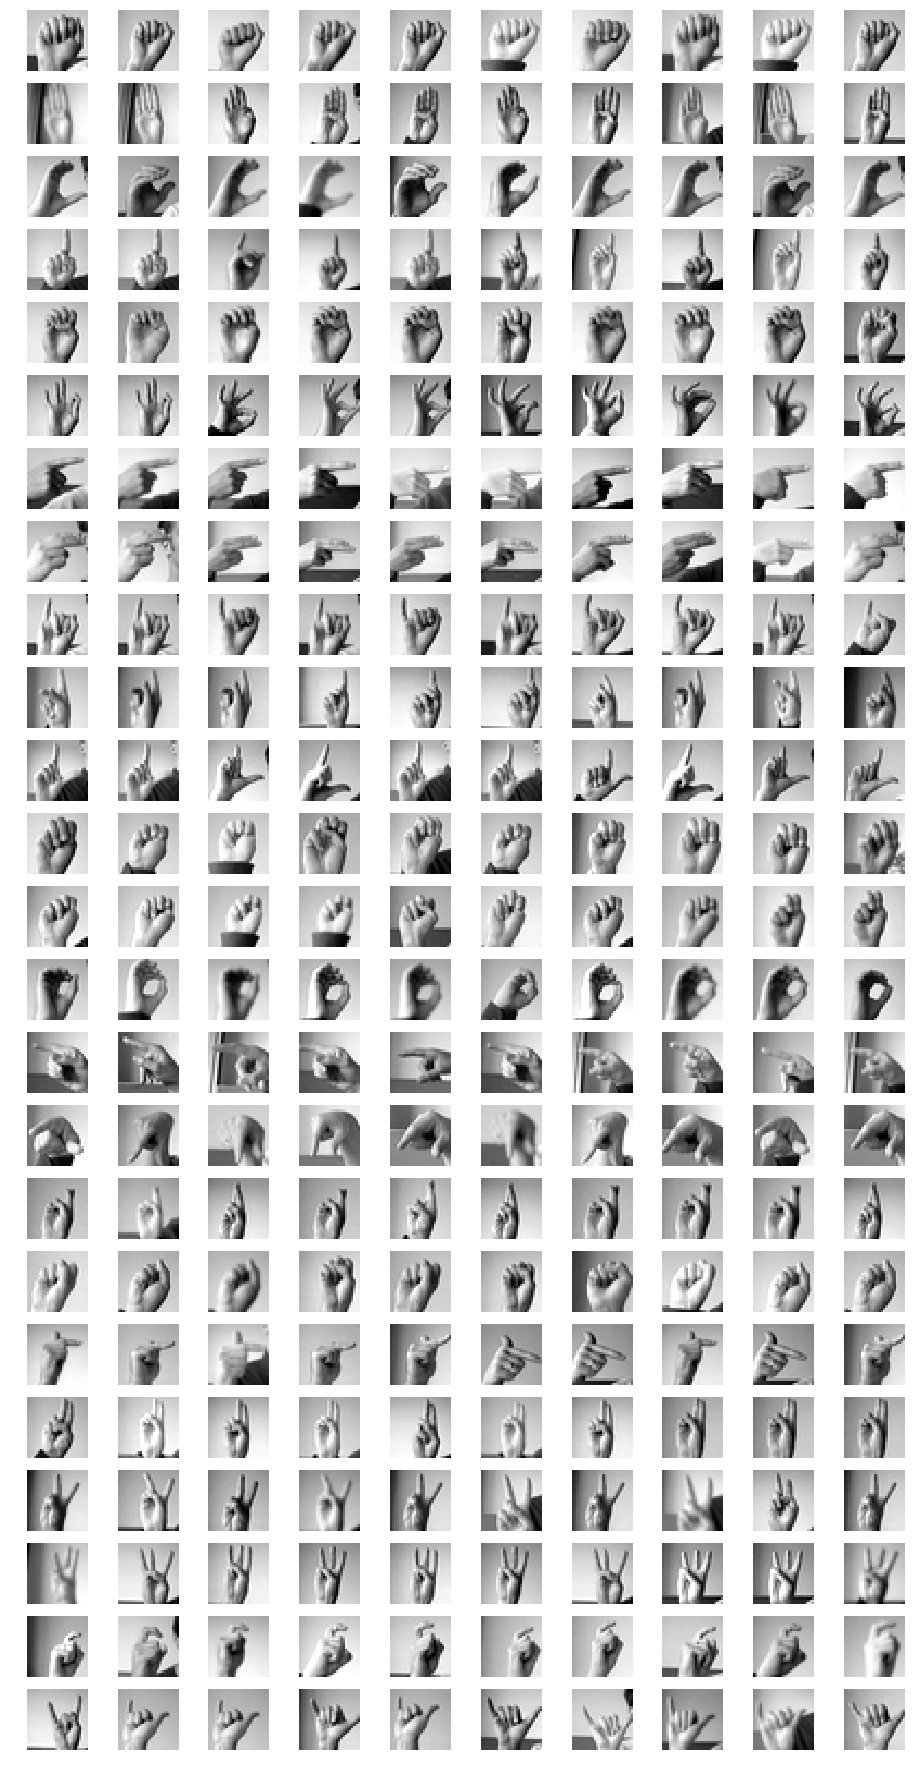

In [567]:
def print_images(x,y):           
    f, ax = plt.subplots(24, 10, figsize=(16,32))
    for i in range(9):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i):
                index.append(w)
        for w in range(10):
            ax[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            ax[i,w].axis('off')
    for i in range(9,24):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i+1):
                index.append(w)
        for w in range(10):
            ax[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            ax[i,w].axis('off')
    plt.show()
    
print_images(x_t,y_t)

Además, el dataset viene con la siguiente imágen de guía:

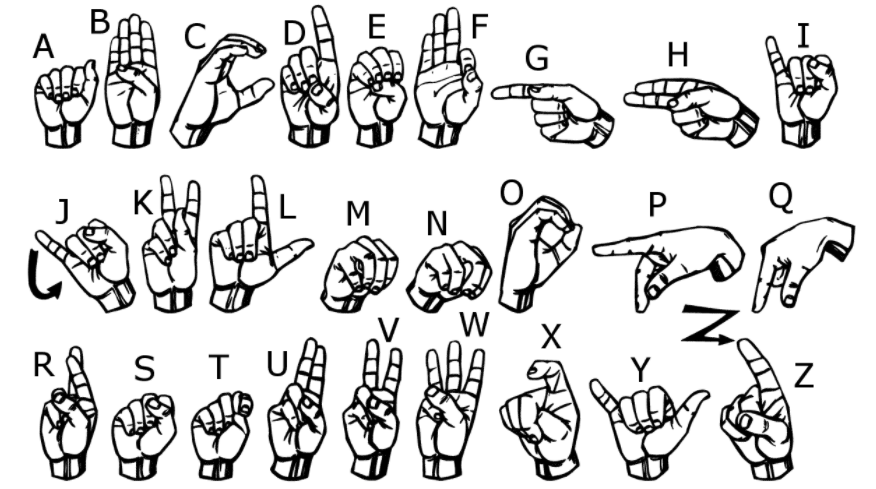

De la cual se aprecia que las letras J y Z implican movimientos de la mano, característica que no puede ser capturada en una sola imágen. Por esta razón, es que no existen datos paras las letras J ni Z.

#### (b) Escalado y normalización de los conjuntos de datos $x$.

Primero, se escalan de modo que el máximo valor posible sea igual a 1 (dividiendo por 255). Esto genera una nueva versión de los conjuntos generados en (a).

In [185]:
import numpy as np

x_tr_scaled = np.array(x_tr)/255.0
x_v_scaled = np.array(x_v)/255.0
x_t_scaled = np.array(x_t)/255.0

Luego, se genera otra versión de los conjuntos, los cuales se escalan y se centran en el cero, restando a cada valor de todos los conjuntos la media del conjunto de entrenamiento.

In [186]:
media = np.mean(x_tr_scaled, axis=0)

x_tr_scaled_centered = x_tr_scaled-media
x_v_scaled_centered = x_v_scaled-media
x_t_scaled_centered = x_t_scaled-media

Se examina los cambios producidos en las nuevas versiones de los conjuntos de datos.

In [187]:
pd.DataFrame(x_tr_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,...,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000
mean,0.570033,0.582074,0.592753,0.601807,0.612385,0.621006,0.629118,0.636509,0.642911,0.649058,...,0.554521,0.579599,0.602064,0.624907,0.636517,0.639469,0.639843,0.636187,0.632938,0.627849
std,0.162742,0.157339,0.153991,0.152126,0.146080,0.142302,0.137862,0.132446,0.128302,0.123085,...,0.249643,0.256284,0.252121,0.249054,0.249078,0.247999,0.248139,0.247410,0.248890,0.251948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474510,0.494118,0.509804,0.521569,0.537255,0.549020,0.556863,0.564706,0.572549,0.580392,...,0.360784,0.376471,0.403922,0.439216,0.474510,0.494118,0.505882,0.503922,0.505882,0.494118
50%,0.588235,0.600000,0.611765,0.619608,0.627451,0.635294,0.643137,0.647059,0.650980,0.654902,...,0.564706,0.639216,0.678431,0.705882,0.717647,0.721569,0.721569,0.713725,0.713725,0.713725
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.729412,...,0.768627,0.792157,0.803922,0.811765,0.815686,0.811765,0.811765,0.807843,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
pd.DataFrame(x_tr_scaled_centered).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,...,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04,2.395500e+04
mean,-6.073205e-17,4.449234e-19,7.582237e-17,5.535589e-17,6.803621e-17,3.192326e-17,-5.346497e-17,-3.040310e-18,8.449838e-17,1.273593e-16,...,-6.421728e-17,-2.565725e-17,-8.616684e-17,-2.521233e-17,-5.012804e-17,-3.663203e-17,1.208709e-17,-5.932313e-17,1.453417e-17,6.570036e-17
std,1.627422e-01,1.573391e-01,1.539914e-01,1.521261e-01,1.460802e-01,1.423016e-01,1.378616e-01,1.324464e-01,1.283022e-01,1.230853e-01,...,2.496430e-01,2.562843e-01,2.521208e-01,2.490542e-01,2.490776e-01,2.479989e-01,2.481387e-01,2.474098e-01,2.488900e-01,2.519476e-01
min,-5.700329e-01,-5.820742e-01,-5.927529e-01,-6.018071e-01,-6.123853e-01,-6.210059e-01,-6.291185e-01,-6.365088e-01,-6.429110e-01,-6.490585e-01,...,-5.545208e-01,-5.795995e-01,-6.020642e-01,-6.249075e-01,-6.365167e-01,-6.394693e-01,-6.398425e-01,-6.361870e-01,-6.329379e-01,-6.278493e-01
25%,-9.552306e-02,-8.795659e-02,-8.294899e-02,-8.023852e-02,-7.513041e-02,-7.198628e-02,-7.225574e-02,-7.180293e-02,-7.036199e-02,-6.866633e-02,...,-1.937365e-01,-2.031289e-01,-1.981426e-01,-1.856918e-01,-1.620069e-01,-1.453516e-01,-1.339602e-01,-1.322654e-01,-1.270555e-01,-1.337316e-01
50%,1.820243e-02,1.792577e-02,1.901179e-02,1.780070e-02,1.506567e-02,1.428823e-02,1.401877e-02,1.055001e-02,8.069378e-03,5.843473e-03,...,1.018511e-02,5.961619e-02,7.636721e-02,8.097487e-02,8.113039e-02,8.209936e-02,8.172611e-02,7.753852e-02,8.078759e-02,8.587621e-02
75%,1.123201e-01,1.081218e-01,1.052863e-01,1.001536e-01,9.741861e-02,9.271960e-02,8.852857e-02,8.505981e-02,8.257918e-02,8.035328e-02,...,2.141067e-01,2.125574e-01,2.018574e-01,1.868572e-01,1.791696e-01,1.722954e-01,1.719222e-01,1.716562e-01,1.670621e-01,1.721507e-01
max,4.299671e-01,4.179258e-01,4.072471e-01,3.981929e-01,3.876147e-01,3.789941e-01,3.708815e-01,3.634912e-01,3.570890e-01,3.509415e-01,...,4.454792e-01,4.204005e-01,3.979358e-01,3.750925e-01,3.634833e-01,3.605307e-01,3.601575e-01,3.638130e-01,3.670621e-01,3.721507e-01


In [189]:
pd.DataFrame(x_v_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.571909,0.584269,0.595697,0.604444,0.614004,0.622690,0.630562,0.637430,0.643295,0.649789,...,0.545356,0.570301,0.595895,0.617953,0.625981,0.629380,0.632038,0.628151,0.624901,0.619333
std,0.158375,0.151744,0.147355,0.145960,0.141751,0.137271,0.133560,0.128982,0.126292,0.119753,...,0.252357,0.261070,0.256264,0.255086,0.255720,0.254076,0.255175,0.253700,0.253194,0.256445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082353,0.125490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478431,0.494118,0.509804,0.525490,0.537255,0.549020,0.560784,0.568627,0.576471,0.580392,...,0.349020,0.356863,0.396078,0.431373,0.443137,0.466667,0.489216,0.478431,0.474510,0.466667
50%,0.588235,0.600000,0.611765,0.619608,0.627451,0.635294,0.643137,0.647059,0.650980,0.654902,...,0.552941,0.619608,0.670588,0.701961,0.709804,0.713725,0.717647,0.713725,0.709804,0.705882
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.729412,...,0.764706,0.792157,0.803922,0.811765,0.811765,0.811765,0.811765,0.807843,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
pd.DataFrame(x_v_scaled_centered).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.001876,0.002195,0.002945,0.002637,0.001619,0.001684,0.001444,0.000921,0.000384,0.000731,...,-0.009165,-0.009298,-0.006169,-0.006955,-0.010536,-0.010089,-0.007804,-0.008036,-0.008037,-0.008516
std,0.158375,0.151744,0.147355,0.145960,0.141751,0.137271,0.133560,0.128982,0.126292,0.119753,...,0.252357,0.261070,0.256264,0.255086,0.255720,0.254076,0.255175,0.253700,0.253194,0.256445
min,-0.570033,-0.582074,-0.592753,-0.601807,-0.612385,-0.621006,-0.629118,-0.636509,-0.560558,-0.523568,...,-0.554521,-0.579599,-0.602064,-0.624907,-0.636517,-0.639469,-0.639843,-0.636187,-0.632938,-0.627849
25%,-0.091601,-0.087957,-0.082949,-0.076317,-0.075130,-0.071986,-0.068334,-0.067881,-0.066440,-0.068666,...,-0.205501,-0.222737,-0.205986,-0.193535,-0.193379,-0.172803,-0.150627,-0.157756,-0.158428,-0.161183
50%,0.018202,0.017926,0.019012,0.017801,0.015066,0.014288,0.014019,0.010550,0.008069,0.005843,...,-0.001580,0.040008,0.068524,0.077053,0.073287,0.074256,0.077805,0.077539,0.076866,0.078033
75%,0.112320,0.108122,0.105286,0.100154,0.097419,0.092720,0.088529,0.085060,0.082579,0.080353,...,0.210185,0.212557,0.201857,0.186857,0.175248,0.172295,0.171922,0.171656,0.167062,0.172151
max,0.429967,0.417926,0.407247,0.398193,0.387615,0.378994,0.370882,0.363491,0.357089,0.350942,...,0.445479,0.420401,0.397936,0.375093,0.363483,0.360531,0.360157,0.363813,0.367062,0.372151


In [191]:
pd.DataFrame(x_t_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,0.578559,0.589983,0.601272,0.610445,0.620273,0.630552,0.636403,0.641762,0.649371,0.656123,...,0.543320,0.570744,0.591157,0.610349,0.623111,0.626073,0.620243,0.618325,0.614370,0.606968
std,0.170954,0.164188,0.158599,0.154332,0.148038,0.141533,0.142010,0.140727,0.132243,0.126909,...,0.252948,0.255421,0.257884,0.257118,0.255687,0.256860,0.260759,0.258862,0.263541,0.267785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.023529,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478431,0.494118,0.509804,0.525490,0.537255,0.552941,0.564706,0.568627,0.576471,0.584314,...,0.352941,0.372549,0.388235,0.411765,0.443137,0.446078,0.443137,0.450980,0.435294,0.418627
50%,0.603922,0.615686,0.623529,0.631373,0.639216,0.647059,0.650980,0.658824,0.662745,0.666667,...,0.537255,0.607843,0.658824,0.694118,0.709804,0.713725,0.709804,0.705882,0.705882,0.701961
75%,0.698039,0.701961,0.709804,0.713725,0.721569,0.725490,0.729412,0.733333,0.733333,0.737255,...,0.764706,0.784314,0.800980,0.811765,0.811765,0.815686,0.811765,0.803922,0.807843,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
pd.DataFrame(x_t_scaled_centered).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,0.008526,0.007909,0.008519,0.008638,0.007888,0.009546,0.007285,0.005253,0.006460,0.007064,...,-0.011201,-0.008856,-0.010907,-0.014559,-0.013406,-0.013397,-0.019599,-0.017862,-0.018568,-0.020882
std,0.170954,0.164188,0.158599,0.154332,0.148038,0.141533,0.142010,0.140727,0.132243,0.126909,...,0.252948,0.255421,0.257884,0.257118,0.255687,0.256860,0.260759,0.258862,0.263541,0.267785
min,-0.570033,-0.582074,-0.592753,-0.601807,-0.612385,-0.581790,-0.629118,-0.636509,-0.642911,-0.625529,...,-0.554521,-0.579599,-0.602064,-0.624907,-0.636517,-0.639469,-0.639843,-0.636187,-0.632938,-0.627849
25%,-0.091601,-0.087957,-0.082949,-0.076317,-0.075130,-0.068065,-0.064413,-0.067881,-0.066440,-0.064745,...,-0.201580,-0.207050,-0.213829,-0.213143,-0.193379,-0.193391,-0.196705,-0.185207,-0.197644,-0.209222
50%,0.033889,0.033612,0.030776,0.029565,0.026830,0.026053,0.021862,0.022315,0.019834,0.017608,...,-0.017266,0.028244,0.056759,0.069210,0.073287,0.074256,0.069961,0.069695,0.072944,0.074112
75%,0.128006,0.119887,0.117051,0.111918,0.109183,0.104484,0.100293,0.096825,0.090422,0.088196,...,0.210185,0.204714,0.198916,0.186857,0.175248,0.176217,0.171922,0.167735,0.174905,0.172151
max,0.429967,0.417926,0.407247,0.398193,0.387615,0.378994,0.370882,0.363491,0.357089,0.350942,...,0.445479,0.420401,0.397936,0.375093,0.363483,0.360531,0.360157,0.363813,0.367062,0.372151


#### (c) Diseño de una red neuronal que resuelva el problema planteado. Experimentación con las tres versiones de datasets generadas.

Primero, se probará entrenar una red neuronal sobre el conjunto de pixeles sin escalar ni centrar. Para evitar sobreextender el trabajo, se configurará `verbose=0` y se planteará el gráfico de error de clasificación de entrenamiento y validación en función del *epoch*.

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

modelo_4a_1 = Sequential()
modelo_4a_1.add(Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_4a_1.add(Dense(30, kernel_initializer='uniform', activation='relu'))
modelo_4a_1.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
modelo_4a_1.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
resultados_4a_1 = modelo_4a_1.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=0,
validation_data=(x_v.values,to_categorical(y_v))).history

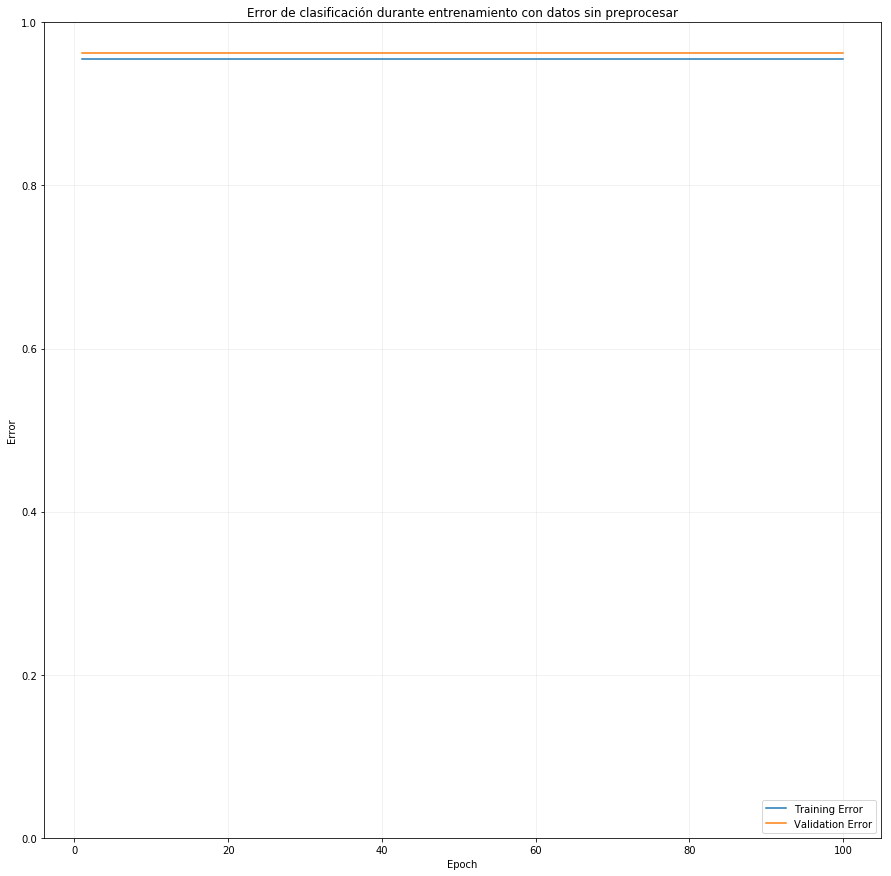

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.title("Error de clasificación durante entrenamiento con datos sin preprocesar")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_1['acc']), label="Training Error")
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_1['val_acc']), label="Validation Error")
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,1])
plt.show()

Se observa que ambos errores se aproximan mucho al 100%. Observando el último error alcanzado: 

In [196]:
print('Error de Entrenamiento:', round(1-np.array(resultados_4a_1['acc'][-1]),4))
print('Error de Validación:', round(1-np.array(resultados_4a_1['val_acc'][-1]),4))

Error de Entrenamiento: 0.9554
Error de Validación: 0.9626


Se verifica que ambos errores son bastante altos. De hecho, son comparables a la probabilidad de fallar una clasificación de manera completamente aleatoria entre las 25 clases posibles:

\begin{equation}
Error\ Validacion \approx P(fallar\ si\ elijo\ al\ azar) = 1 - P(acertar\ si\ elijo\ al\ azar) = 1 - \frac{1}{25} = \frac{24}{25} = 0.96
\end{equation}

Por lo que el rendimiento de esta red neuronal es casi el mismo que si se eligiera clasificaciones al azar. Este mal resultado se debe a que el conjunto de datos no se escaló ni centró. A continuación, se entrena otra red idéntica a la anterior, pero usando el conjunto de datos escalados y no centrados.

In [200]:
modelo_4a_2 = Sequential()
modelo_4a_2.add(Dense(30, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_4a_2.add(Dense(30, kernel_initializer='uniform', activation='relu'))
modelo_4a_2.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
modelo_4a_2.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
resultados_4a_2 = modelo_4a_2.fit(x_tr_scaled, to_categorical(y_tr), epochs=100, batch_size=128, verbose=0,
validation_data=(x_v_scaled,to_categorical(y_v))).history

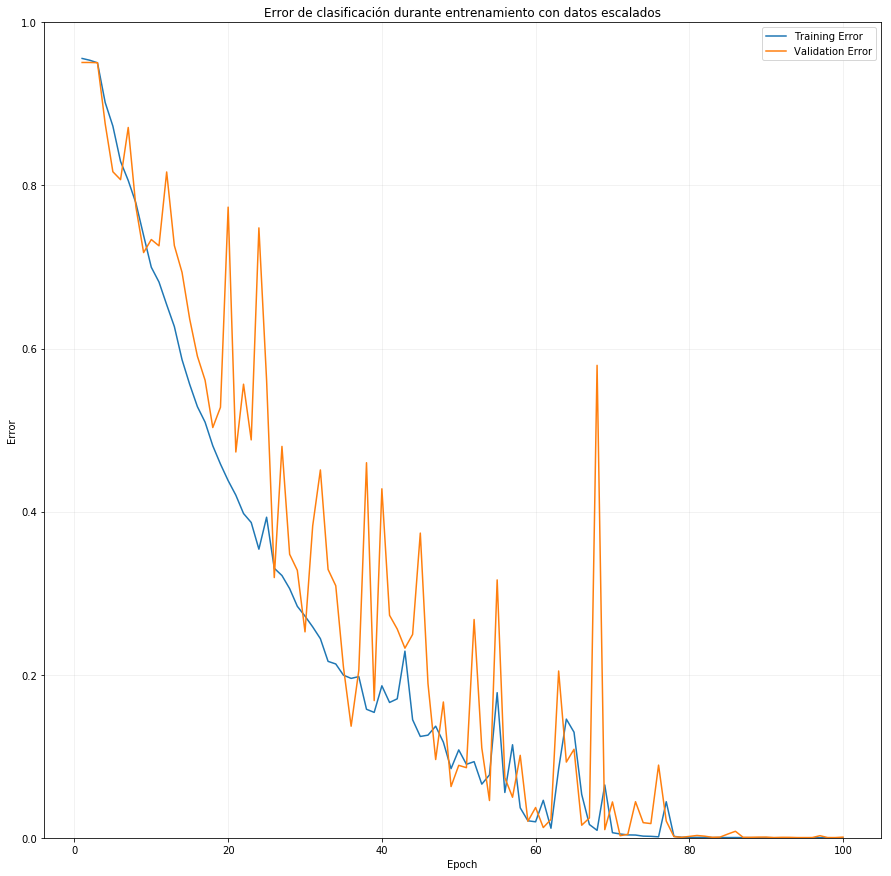

In [201]:
plt.figure(figsize=(15,15))
plt.title("Error de clasificación durante entrenamiento con datos escalados")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_2['acc']), label="Training Error")
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_2['val_acc']), label="Validation Error")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,1])
plt.show()

Usando datos escalados, el rendimiento ahora mejora conforme aumenta el entrenamiento (aunque de manera un poco errática, experimentando bruscas subidas y bajadas entre *epochs*), por lo que la red neuronal aprende, acercándose al cero porciento de error aproximadamente en el *epoch* 80. Revisando el error alcanzado al finalizar el entrenamiento:

In [202]:
e1 = 1.0-resultados_4a_2['acc'][-1]
e2 = 1.0-resultados_4a_2['val_acc'][-1]

print('Error de Entrenamiento: %f' % e1)
print('Error de Validación: %f' % e2)

Error de Entrenamiento: 0.000000
Error de Validación: 0.000857


Se tiene que, para el conjunto de validación, el error llega a ser del $0.0857\%$, un rendimiento casi perfecto.

A continuación, se experimenta con los datos escalados y centrados en cero, usando una red con la misma arquitectura que las anteriores.

In [209]:
from keras.callbacks import Callback

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        resultados_test_4a_3['loss'].append(loss)
        resultados_test_4a_3['acc'].append(acc)
        #print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

resultados_test_4a_3 = {'loss': [], 'acc': []}
modelo_4a_3 = Sequential()
modelo_4a_3.add(Dense(30, input_dim=x_tr_scaled_centered.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_4a_3.add(Dense(30, kernel_initializer='uniform', activation='relu'))
modelo_4a_3.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
modelo_4a_3.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
resultados_4a_3 = modelo_4a_3.fit(x_tr_scaled_centered, to_categorical(y_tr), epochs=100, batch_size=128, verbose=0,
validation_data=(x_v_scaled_centered,to_categorical(y_v)), callbacks=[TestCallback((x_t_scaled_centered, to_categorical(y_t)))]).history

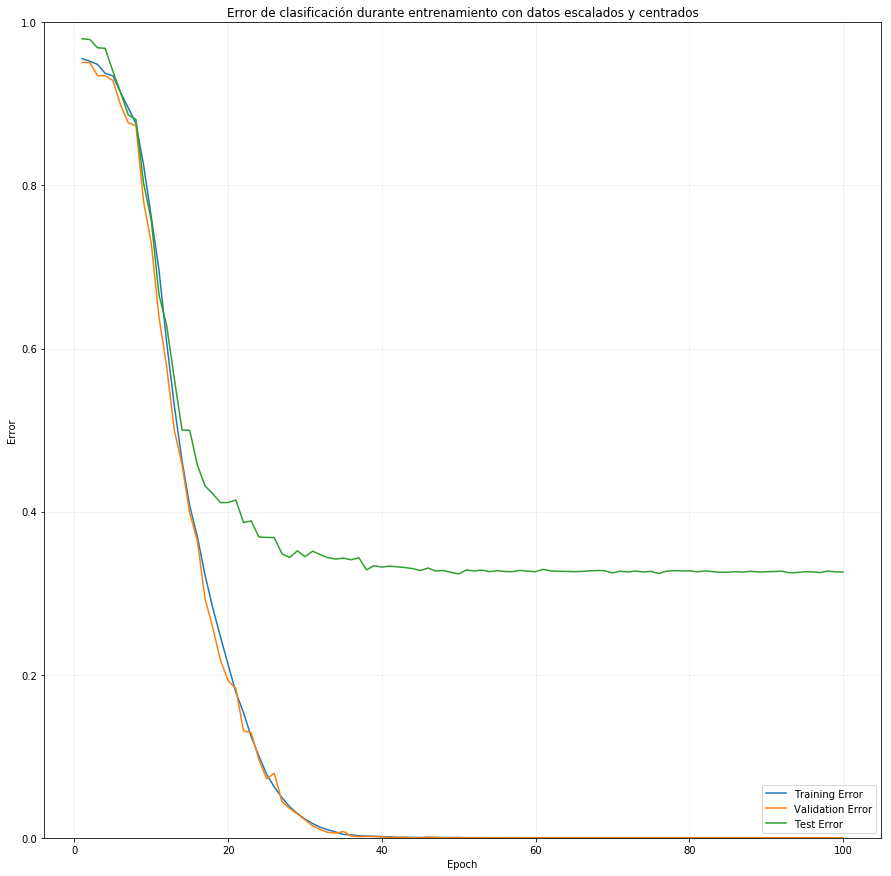

In [210]:
plt.figure(figsize=(15,15))
plt.title("Error de clasificación durante entrenamiento con datos escalados y centrados")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_3['acc']), label="Training Error")
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_4a_3['val_acc']), label="Validation Error")
plt.plot(np.linspace(1,100, 100), 1-np.array(resultados_test_4a_3['acc']), label="Test Error")
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,1])
plt.show()

Aquí, se ha graficado el error de entrenamiento, validación y de prueba en función del *epoch*. El aprendizaje, en este caso, es mucho más suave, sin variaciones erráticas entre *epochs*, como en el caso anterior, y acercándose a un error cercano al $0\%$ de manera más rápida, en el *epoch* 40 aproximadamente. El error alcanzado al último *epoch* es:

In [211]:
e1 = 1.0-resultados_4a_3['acc'][-1]
e2 = 1.0-resultados_4a_3['val_acc'][-1]

print('Minimo error de Entrenamiento: %f' % e1)
print('Minimo error de Validación: %f' % e2)

Minimo error de Entrenamiento: 0.000000
Minimo error de Validación: 0.000000


Usando datos escalados y centrados resulta en que la misma red alcanza un error de validación del $0.0000\%$. Inocentemente, se está tentado a elegir a esta red y datos preprocesados como los mejores, pero en este caso ha ocurrido algo bastante notable. El error de validación pretende ser una aproximación al error de clasificación de las entradas futuras que la red neuronal tendrá que procesar, por lo que se espera que el error de validación sea aproximadamente el mismo que el error de pruebas, que bordea el $35\%$ a partir del *epoch* 40 aproximadamente. Pero, como se ve en el gráfico, el error de validación decrece en conjunto con el de entrenamiento, casi como si la red neuronal se estuviera entrenando también con los datos de validación. Se ha buscado verificar la posibilidad de este hecho, pero no es el caso. Entonces ¿Por qué el error de validación no se aproxima al de pruebas? Está claro que no es posible usar el error de validación como criterio de elección, pues no se comporta como debiese.

Dada esta situación, se experimenta con usar otra métrica como criterio de elección: la medida de pérdida `categorical_crossentropy`.

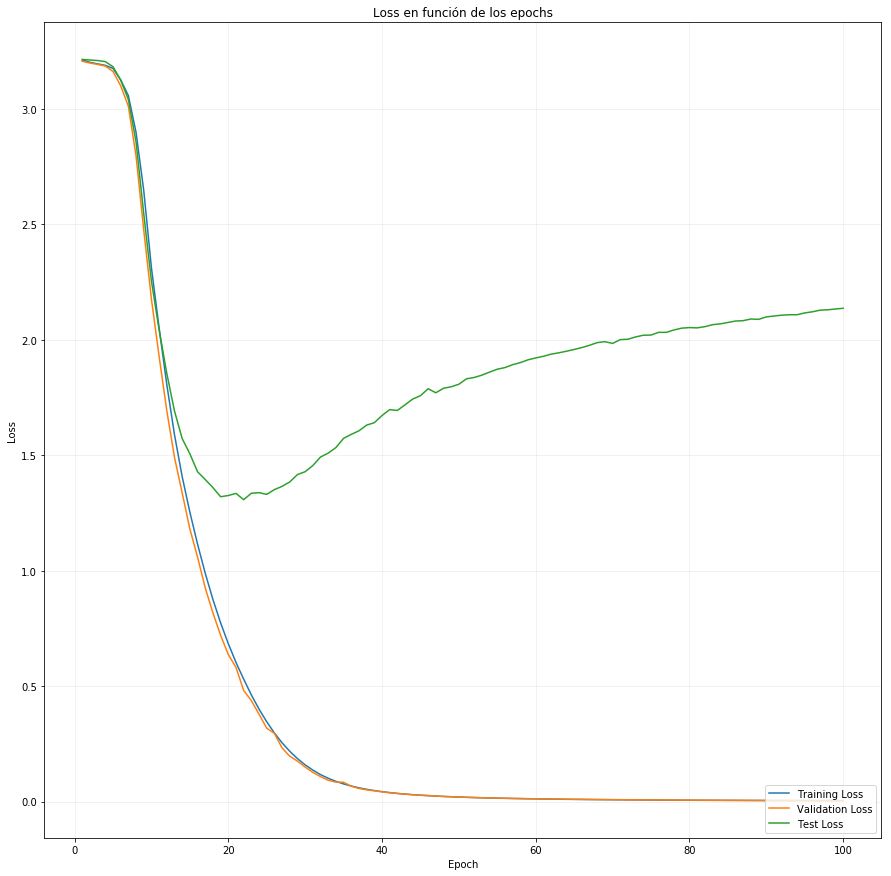

In [212]:
plt.figure(figsize=(15,15))
plt.title("Loss en función de los epochs")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,100, 100), resultados_4a_3['loss'], label="Training Loss")
plt.plot(np.linspace(1,100, 100), resultados_4a_3['val_loss'], label="Validation Loss")
plt.plot(np.linspace(1,100, 100), resultados_test_4a_3['loss'], label="Test Loss")
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [305]:
print('Loss de Entrenamiento:', np.array(resultados_4a_3['loss'][-1]))
print('Loss de Validación:', np.array(resultados_4a_3['val_loss'][-1]))

Loss de Entrenamiento: 0.0040687564253477386
Loss de Validación: 0.004501050197652408


Sin embargo, se observa que el Validation Loss no se comporta como el Test Loss, por lo tanto, no sirve tanto como métrica de decisión.

Otra alternativa es regenerar los conjuntos de entrenamiento y validación, tomando los datos con más cuidado.

Este experimento se llevó a cabo, y resultó ser demasiado extenso, y tampoco demostró lograr una mejora en el comportamiento del error de validación. Por lo tanto, la métrica definitiva será la medida de pérdida.

Para lograr un menor error de validación, se experimentó con la arquitectura de la red. Primero, varió la cantidad de neuronas y se regularizó agregando capas `Dropout`. Luego y en adición a lo anterior, se probó el conjunto de datos escalados y no centrados, se añadió otra capa oculta, se aumentó la cantidad de *epochs*, y se disminuyó el *learning rate* `lr`.

A continuación, se presenta el modelo que sin variar la cantidad de capas ocultas, *epochs*, ni `lr`, obtivo el mejor *Validation Loss*.

In [492]:
from keras.callbacks import Callback
from keras.layers import Dropout

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        resultados_test_4a_4['loss'].append(loss)
        resultados_test_4a_4['acc'].append(acc)
        #print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

resultados_test_4a_4 = {'loss': [], 'acc': []}
modelo_4a_4 = Sequential()
modelo_4a_4.add(Dense(100, input_dim=x_tr_scaled_centered.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_4a_4.add(Dropout(0.1))
modelo_4a_4.add(Dense(50, kernel_initializer='uniform', activation='relu'))
modelo_4a_4.add(Dropout(0.1))
modelo_4a_4.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
modelo_4a_4.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
resultados_4a_4 = modelo_4a_4.fit(x_tr_scaled_centered, to_categorical(y_tr), epochs=100, batch_size=128, verbose=0,
validation_data=(x_v_scaled_centered,to_categorical(y_v)), callbacks=[TestCallback((x_t_scaled_centered,to_categorical(y_t)))]).history

Se observa la evolución de la medida de pérdida con el avance del entrenamiento.

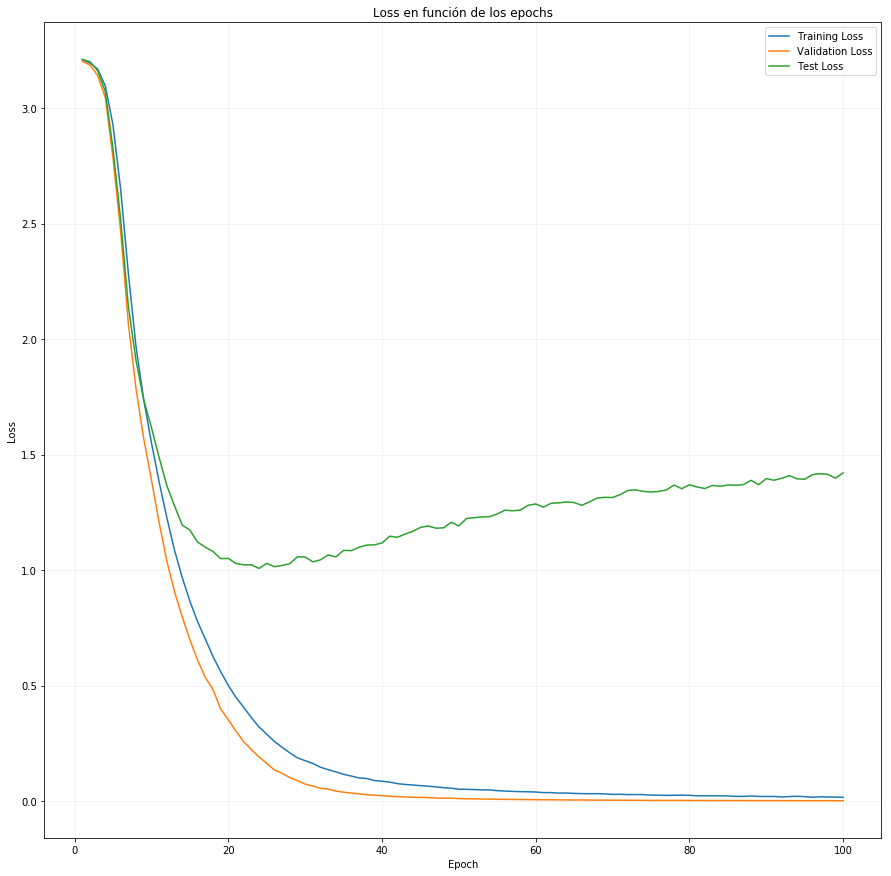

In [493]:
plt.figure(figsize=(15,15))
plt.title("Loss en función de los epochs")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,100, 100), resultados_4a_4['loss'], label="Training Loss")
plt.plot(np.linspace(1,100, 100), resultados_4a_4['val_loss'], label="Validation Loss")
plt.plot(np.linspace(1,100, 100), resultados_test_4a_4['loss'], label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

El *Loss* (sin tener en cuenta el de pruebas) alcanzado por esta red es de:

In [494]:
print('Loss de Entrenamiento:', np.array(resultados_4a_4['loss'][-1]))
print('Loss de Validación:', np.array(resultados_4a_4['val_loss'][-1]))

Loss de Entrenamiento: 0.01621096452868786
Loss de Validación: 0.0016368111175085818


Luego, se probó agregando capas ocultas adicionales, la cantidad de *epochs* y variando `lr`. Tras varios experimentos, se presenta el modelo que obtuvo mejor *Validation Loss*. 

In [524]:
from keras.callbacks import Callback
from keras.layers import Dropout

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        resultados_test_4a_5['loss'].append(loss)
        resultados_test_4a_5['acc'].append(acc)
        #print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

resultados_test_4a_5 = {'loss': [], 'acc': []}
modelo_4a_5 = Sequential()
modelo_4a_5.add(Dense(400, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
modelo_4a_5.add(Dropout(0.05))
modelo_4a_5.add(Dense(200, kernel_initializer='uniform', activation='relu'))
modelo_4a_5.add(Dropout(0.05))
modelo_4a_5.add(Dense(100, activation='relu'))
modelo_4a_5.add(Dropout(0.05))
modelo_4a_5.add(Dense(50, activation='relu'))
modelo_4a_5.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
modelo_4a_5.compile(optimizer=SGD(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])
resultados_4a_5 = modelo_4a_5.fit(x_tr_scaled, to_categorical(y_tr), epochs=120, batch_size=128, verbose=0,
validation_data=(x_v_scaled,to_categorical(y_v)), callbacks=[TestCallback((x_t_scaled,to_categorical(y_t)))]).history

Se observan las medidas de *Loss*:

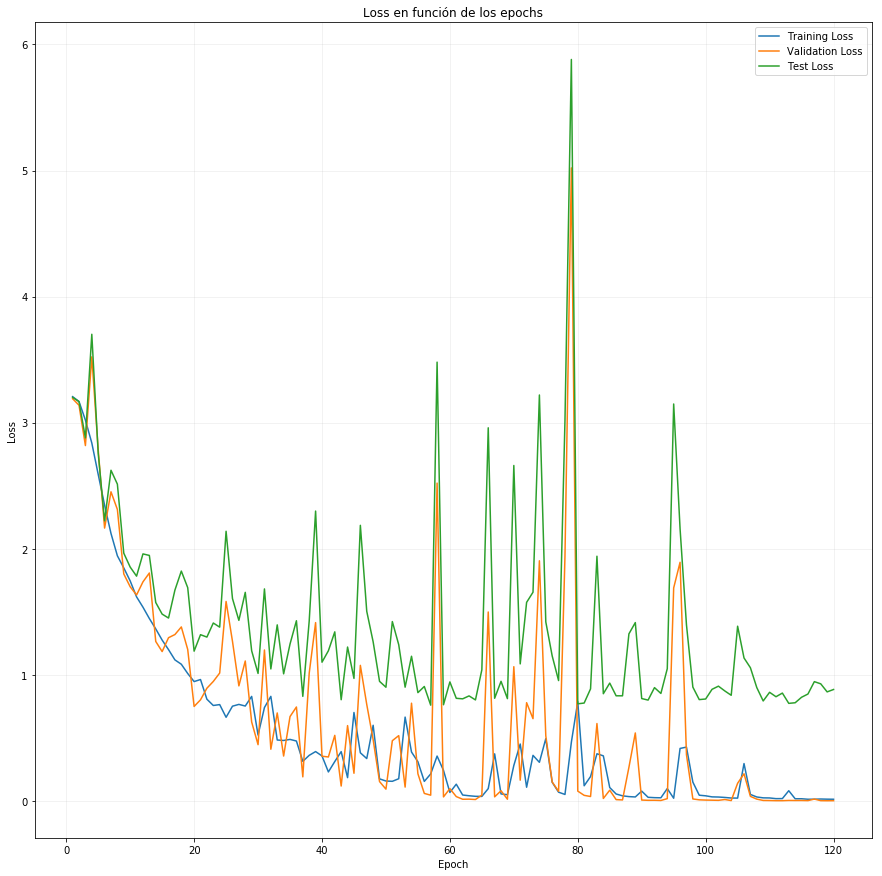

In [525]:
plt.figure(figsize=(15,15))
plt.title("Loss en función de los epochs")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,120, 120), resultados_4a_5['loss'], label="Training Loss")
plt.plot(np.linspace(1,120, 120), resultados_4a_5['val_loss'], label="Validation Loss")
plt.plot(np.linspace(1,120, 120), resultados_test_4a_5['loss'], label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Donde, el *Loss* al último epoch es:

In [526]:
print('Loss de Entrenamiento:', np.array(resultados_4a_5['loss'][-1]))
print('Loss de Validación:', np.array(resultados_4a_5['val_loss'][-1]))

Loss de Entrenamiento: 0.01274884202917235
Loss de Validación: 0.001390481846673148


Por lo tanto, en resumen, el *Loss* obtenido se resume de la siguiente manera:

| Modelo                    | *Validation Loss* |
|---------------------------|-------------------|
| Enunciado                 | 0.0045            |
| +Neuronas, +Dropout       | 0.0016            |
| +Todas las Modificaciones | 0.0014            |
|


Por lo tanto, se usará el último modelo para evaluar el error de pruebas:

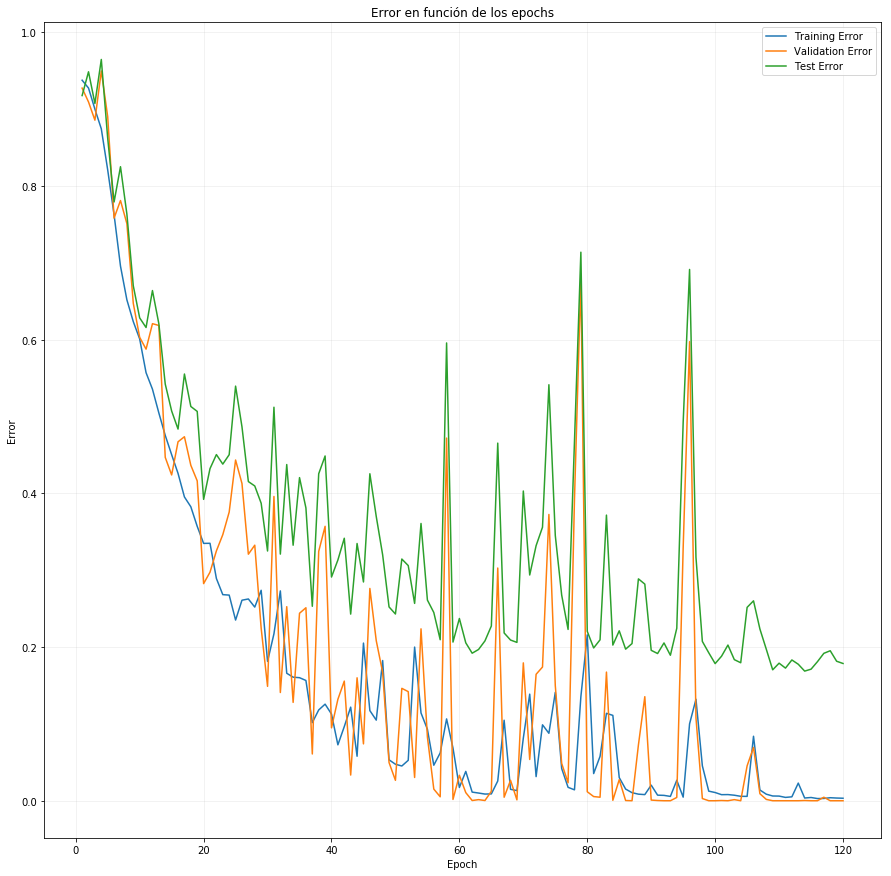

In [527]:
plt.figure(figsize=(15,15))
plt.title("Error en función de los epochs")
plt.grid(alpha=0.2)
plt.plot(np.linspace(1,120, 120), 1-np.array(resultados_4a_5['acc']), label="Training Error")
plt.plot(np.linspace(1,120, 120), 1-np.array(resultados_4a_5['val_acc']), label="Validation Error")
plt.plot(np.linspace(1,120, 120), 1-np.array(resultados_test_4a_5['acc']), label="Test Error")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Donde, en el último *epoch*, se tiene que:

In [528]:
e1 = 100*(1.0-resultados_4a_5['acc'][-1])
e2 = 100*(1.0-resultados_4a_5['val_acc'][-1])
e3 = 100*(1.0-resultados_test_4a_5['acc'][-1])

e1 = round(e1)
e2 = round(e2)
e3 = round(e3)

print('Error de Entrenamiento: {}%'.format(e1))
print('Error de Validación: {}%'.format(e2))
print('Error de Prueba: {}%'.format(e3))

Error de Entrenamiento: 0.0%
Error de Validación: 0.0%
Error de Prueba: 18.0%


En efecto, el modelo encontrado logra superar el umbral de rendimiento requerido de $20\%$ de error de prueba.

Resulta llamativo el hecho de que no se usó la métrica de *accuracy* o error de validación, pues ésta se comportaba de la misma manera que la de entrenamiento, por lo que no era **representativa** de lo que el modelo tendría que procesar en futuros datos de prueba. Además, el *validation error* convergía a cero porciento rápidamente, por lo que no era posible hacer la elección de un modelo por sobre otros. La solución a esta situación fue cambiar la métrica de decisión por la del *validation loss*, que a pesar de que tampoco era representativa, sí permitió elegir el mejor de los modelos de forma correcta y demostrada, pues nunca convergía a cero de forma directa como el error.

#### (d) Matriz de confusión de la red neuronal anterior

In [553]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(modelo_4a_5.predict_classes(x_t_scaled_centered), y_t)

# Normalizacion de la matriz
matriz_confusion = matriz_confusion.astype('float') / matriz_confusion.sum(axis=1)[:, np.newaxis]

6656/7172 [==========================>...] - ETA: 0s

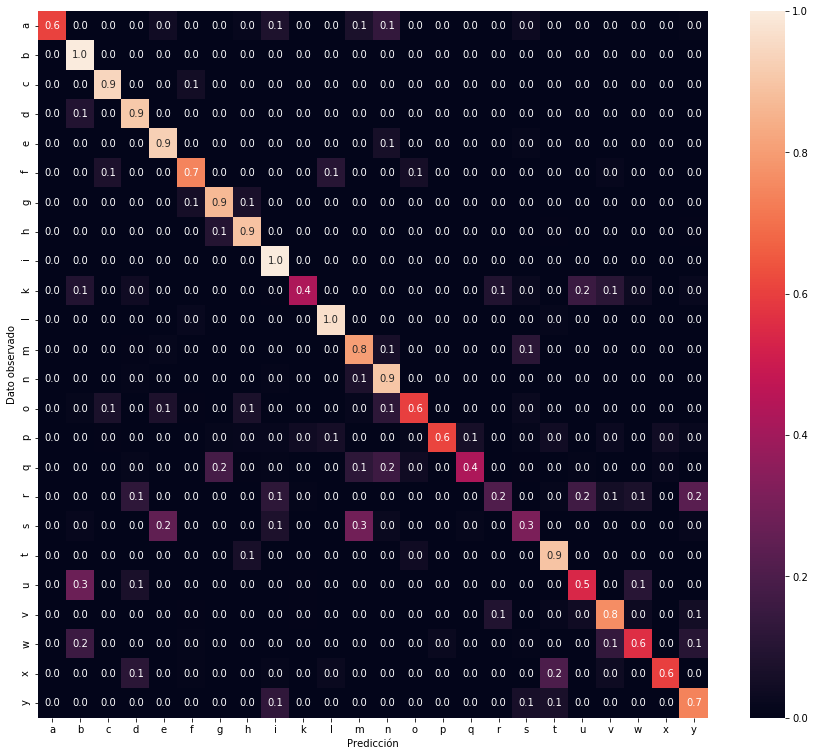

In [561]:
import seaborn

etiquetas = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

plt.figure(figsize=(15,13))
seaborn.heatmap(matriz_confusion, annot=True, fmt='.1f', xticklabels=etiquetas, yticklabels=etiquetas)
plt.ylabel('Dato observado')
plt.xlabel('Predicción')
plt.show()
seaborn.reset_orig()

En una matriz de confusión multiclase, el eje vertical representan los datos observados, y el horizontal a las predicciones que el modelo hizo para ese dato. La diagonal, por lo tanto, representa qué fracción de los datos de dicha clase fueron bien clasificados, por lo que la matriz de confusión ideal sería igual a la matriz identidad. De la red neuronal entrenada en el ítem anterior y su matriz de confusión, se observa que los datos del tipo S son bien clasificado sólo un 30% de las veces, siendo confundida un 30% de las veces por M y en un 20% por E.

Observar una imágen de ejemplo puede ser de ayuda para entender visualmente la confusión:

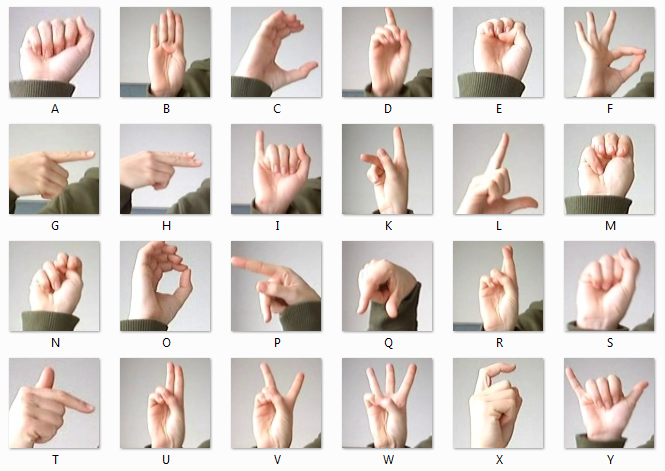

Al observar E, M y S, se nota que la razón de la confusión es evidente: las tres letras se forman haciendo un puño, que pueden verse muy similares y sin características diferenciadoras tan evidentes. Es destacable que, a pesar de confundir S con E y M, no se confunde casi nada (bajo el 5% de las veces) con N, o bien con A, ambas que son letras que también se hace con un puño.

Otra confusión, un poco menos evidente, es que al recibir Q, la red neuronal la clasifica erróneamente como G o como N, un 20% de las veces cada una, y como M en un 10%. En este caso se observa que los contornos de la mano es similar en estas letras, lo que probablemente gatilló la confusión.

Una posible solución al problema de datos similares pero de diferentes clases, sería incluir más instancias de esos datos en el conjunto de entrenamiento, de manera que se pueda reforzar el aprendizaje en características no tan evidentes.

#### (e) Entrenamiento de una SVM no lineal para resolver el problema.

Se probará sobre las distintas versiones de los conjuntos de datos, como así también se harán ajustes basándose en el rendimiento sobre el conjunto de validación.

IMPORTANTE: Dado el costo de tiempo que implica entrenar modelos SVM no lineales, se experimentará usando muestreos de los datasets originales, lo que podría disminuir la confiabilidad de los resultados.

In [596]:
# Conjuntos de datos muestreados

x_tr_muestreado = x_tr[:10000]
y_tr_muestreado = y_tr[:10000]

x_tr_muestreado_scaled = x_tr_muestreado/255.0
x_v_muestreado_scaled = x_v/255.0
x_t_muestreado_scaled = x_t/255.0

x_tr_muestreado_scaled_centered = x_tr_muestreado_scaled-np.mean(x_tr_muestreado_scaled)
x_v_muestreado_scaled_centered = x_v_muestreado_scaled-np.mean(x_tr_muestreado_scaled)
x_t_muestreado_scaled_centered = x_t_muestreado_scaled-np.mean(x_tr_muestreado_scaled)

In [606]:
import time
from sklearn.svm import SVC as SVM

start_time = time.time()
modelo_4e_1 = SVM()
modelo_4e_1.fit(x_tr_muestreado, y_tr_muestreado)
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Completado en: 182 [s]


In [607]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred1 = modelo_4e_1.predict(x_tr[:1000])
pred2 = modelo_4e_1.predict(x_v[:1000])
pred3 = modelo_4e_1.predict(x_t[:1000])

e1 = (1.0-accuracy_score(y_tr[:1000], pred1))
e2 = (1.0-accuracy_score(y_v[:1000], pred2))
e3 = (1.0-accuracy_score(y_t[:1000], pred3))

e1 = 100.0*e1
e2 = 100.0*e2
e3 = 100.0*e3

print('Error de Entrenamiento: {}%'.format(e1))
print('Error de Validación: {}%'.format(e2))
print('Error de Prueba: {}%'.format(e3))
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Error de Entrenamiento: 0.0%
Error de Validación: 85.7%
Error de Prueba: 98.2%
Completado en: 27 [s]


In [608]:
start_time = time.time()
modelo_4e_2 = SVM()
modelo_4e_2.fit(x_tr_muestreado_scaled, y_tr_muestreado)
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Completado en: 96 [s]


In [609]:
start_time = time.time()
e1 = 1.0-accuracy_score(y_tr_muestreado, modelo_4e_2.predict(x_tr_muestreado_scaled))
e2 = 1.0-accuracy_score(y_v, modelo_4e_2.predict(x_v_muestreado_scaled))
e3 = 1.0-accuracy_score(y_t, modelo_4e_2.predict(x_t_muestreado_scaled))

e1 = 100.0*e1
e2 = 100.0*e2
e3 = 100.0*e3

print('Error de Entrenamiento: {}%'.format(e1))
print('Error de Validación: {}%'.format(e2))
print('Error de Prueba: {}%'.format(e3))
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Error de Entrenamiento: 31.120000000000005%
Error de Validación: 31.771428571428572%
Error de Prueba: 44.5064138315672%
Completado en: 163 [s]


In [610]:
start_time = time.time()
modelo_4e_3 = SVM()
modelo_4e_3.fit(x_tr_muestreado_scaled_centered, y_tr_muestreado)
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Completado en: 89 [s]


In [611]:
start_time = time.time()
e1 = 1.0-accuracy_score(y_tr_muestreado, modelo_4e_3.predict(x_tr_muestreado_scaled_centered))
e2 = 1.0-accuracy_score(y_v, modelo_4e_3.predict(x_v_muestreado_scaled_centered))
e3 = 1.0-accuracy_score(y_t, modelo_4e_3.predict(x_t_muestreado_scaled_centered))

e1 = 100.0*e1
e2 = 100.0*e2
e3 = 100.0*e3

print('Error de Entrenamiento: {}%'.format(e1))
print('Error de Validación: {}%'.format(e2))
print('Error de Prueba: {}%'.format(e3))
print('Completado en: '+str(round(time.time()-start_time))+' [s]')

Error de Entrenamiento: 31.120000000000005%
Error de Validación: 31.771428571428572%
Error de Prueba: 44.5064138315672%
Completado en: 161 [s]


Se observa que el alto error del primer modelo SVM fue causado por usar datos no escalados. Al escalar, el error de validación se redujo de 85% a 32%. El mismo error se encuentra al usar datos centrados. Lo anterior tiene sentido, pues la distribución de los puntos no se modificó, sólo se desplazó, lo que no afecta al criterio de decisión de la SVM.

Vale la pena mencionar que se experimentó usando distintos kernels: `poly` y `sigmoid`, con los cuales no se obtuvo aprendizaje alguno, por lo que se omitieron para evitar sobreextender este *notebook*.

A continuación, se modificará el parámetro de regularización `C` de la SVM entrenada con los datos escalados.

In [615]:
Cs = [0.001, 0.01, 1, 10, 100, 1000]

err_tr = []
err_v = []
err_t = []

for c in Cs:
    start_time = time.time()
    modelo_4e_4 = SVM(C=c)
    modelo_4e_4.fit(x_tr_muestreado_scaled, y_tr_muestreado)
    print('[C='+str(c)+'] Entrenado después de: '+str(round(time.time()-start_time))+' [s]')
    
    start_time = time.time()
    e1 = 1.0-accuracy_score(y_tr_muestreado, modelo_4e_4.predict(x_tr_muestreado_scaled))
    e2 = 1.0-accuracy_score(y_v, modelo_4e_4.predict(x_v_muestreado_scaled))
    e3 = 1.0-accuracy_score(y_t, modelo_4e_4.predict(x_t_muestreado_scaled))

    e1 = 100.0*e1
    e2 = 100.0*e2
    e3 = 100.0*e3
    
    err_tr.append(e1)
    err_v.append(e2)
    err_t.append(e3)
    print('[C='+str(c)+'] Evaluado después de: '+str(round(time.time()-start_time))+' [s]')

[C=0.001] Entrenado después de: 163 [s]
[C=0.001] Evaluado después de: 176 [s]
[C=0.01] Entrenado después de: 163 [s]
[C=0.01] Evaluado después de: 165 [s]
[C=1] Entrenado después de: 88 [s]
[C=1] Evaluado después de: 157 [s]
[C=10] Entrenado después de: 35 [s]
[C=10] Evaluado después de: 113 [s]
[C=100] Entrenado después de: 18 [s]
[C=100] Evaluado después de: 54 [s]
[C=1000] Entrenado después de: 18 [s]
[C=1000] Evaluado después de: 46 [s]


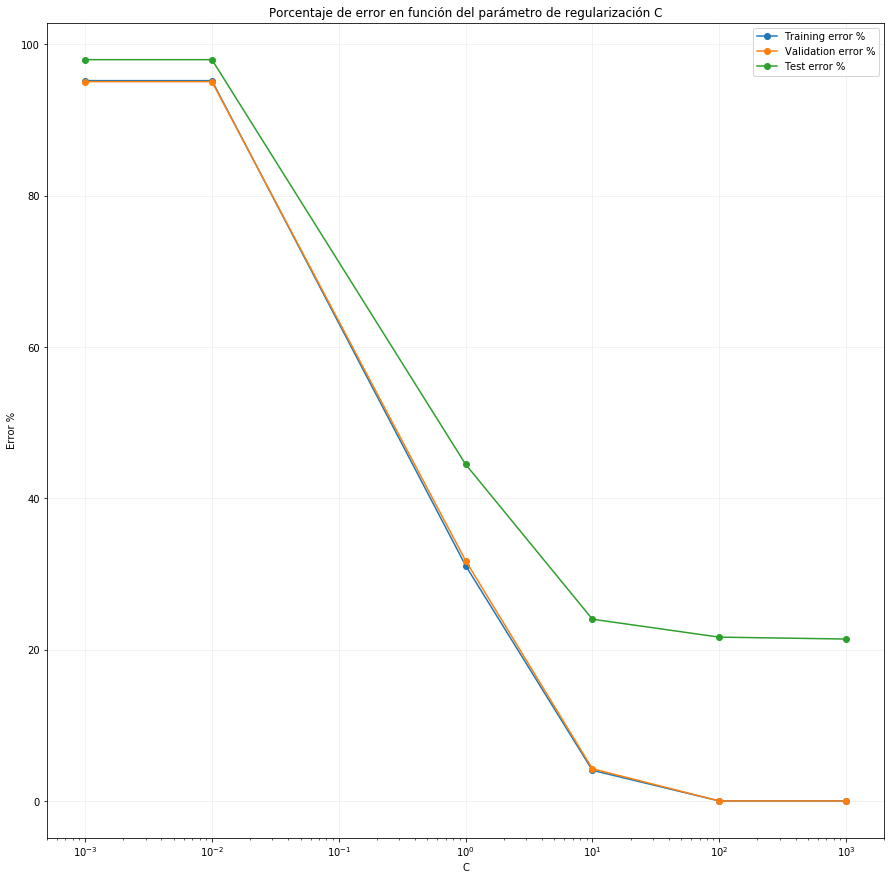

In [620]:
plt.figure(figsize=(15,15))
plt.grid(alpha=0.2)
plt.plot(Cs, err_tr, marker='o', label='Training error %')
plt.plot(Cs, err_v, marker='o', label='Validation error %')
plt.plot(Cs, err_t, marker='o', label='Test error %')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Error %')
plt.title('Porcentaje de error en función del parámetro de regularización C')
plt.legend(loc='upper right')
plt.show()

Entre mayor es `C`, mejor se comporta el error. Comprobando numéricamente:

In [622]:
err_tr

[95.219999999999999,
 95.219999999999999,
 31.120000000000005,
 4.049999999999998,
 0.0,
 0.0]

In [623]:
err_v

[95.085714285714289,
 95.085714285714289,
 31.771428571428572,
 4.2571428571428598,
 0.0,
 0.0]

In [624]:
err_t

[97.992191857222537,
 97.992191857222537,
 44.506413831567201,
 24.023982152816505,
 21.653653095370885,
 21.402677077523702]

El error de entrenamiento y validación es "cero" cuando `C>=100`, lo que es el castigo más severo a datos mal clasificados. Pese a esto, el error en el conjunto de prueba es de 21%, siendo un poco peor que el logrado con la red neuronal del ítem anterior.

#### (f) Entrenamiento de un árbol de clasificación para resolver el problema.

Se usarán los datos sin escalar, los escalados, y los escalados+centrados. Se variará la máxima profundidad y el criterio de *splitting*.

In [627]:
from sklearn.tree import DecisionTreeClassifier as Tree

depths = range(1,101)

err_tr_2 = []
err_v_2 = []
err_t_2 = []

for d in depths:
    start_time = time.time()
    modelo_4f_1= Tree()
    modelo_4f_1.set_params(max_depth=d,criterion='gini',splitter='best')
    modelo_4f_1.fit(x_tr,y_tr)
    print('[max_depth='+str(d)+'] Entrenado después de: '+str(round(time.time()-start_time))+' [s]')
    start_time = time.time()
    yhat_train = modelo_4f_1.predict(x_tr)
    yhat_test = modelo_4f_1.predict(x_t)
    yhat_val = modelo_4f_1.predict(x_v)
    err_tr_2.append(1-accuracy_score(y_tr, yhat_train))
    err_v_2.append(1-accuracy_score(y_v, yhat_val))
    err_t_2.append(1-accuracy_score(y_t, yhat_test))
    print('[max_depth='+str(d)+'] Evaluado después de: '+str(round(time.time()-start_time))+' [s]')

[max_depth=1] Entrenado después de: 1 [s]
[max_depth=1] Evaluado después de: 0 [s]
[max_depth=2] Entrenado después de: 2 [s]
[max_depth=2] Evaluado después de: 0 [s]
[max_depth=3] Entrenado después de: 3 [s]
[max_depth=3] Evaluado después de: 0 [s]
[max_depth=4] Entrenado después de: 3 [s]
[max_depth=4] Evaluado después de: 0 [s]
[max_depth=5] Entrenado después de: 4 [s]
[max_depth=5] Evaluado después de: 0 [s]
[max_depth=6] Entrenado después de: 6 [s]
[max_depth=6] Evaluado después de: 0 [s]
[max_depth=7] Entrenado después de: 7 [s]
[max_depth=7] Evaluado después de: 0 [s]
[max_depth=8] Entrenado después de: 8 [s]
[max_depth=8] Evaluado después de: 0 [s]
[max_depth=9] Entrenado después de: 9 [s]
[max_depth=9] Evaluado después de: 0 [s]
[max_depth=10] Entrenado después de: 10 [s]
[max_depth=10] Evaluado después de: 0 [s]
[max_depth=11] Entrenado después de: 11 [s]
[max_depth=11] Evaluado después de: 0 [s]
[max_depth=12] Entrenado después de: 12 [s]
[max_depth=12] Evaluado después de: 0

[max_depth=97] Entrenado después de: 15 [s]
[max_depth=97] Evaluado después de: 0 [s]
[max_depth=98] Entrenado después de: 15 [s]
[max_depth=98] Evaluado después de: 0 [s]
[max_depth=99] Entrenado después de: 15 [s]
[max_depth=99] Evaluado después de: 0 [s]
[max_depth=100] Entrenado después de: 15 [s]
[max_depth=100] Evaluado después de: 0 [s]


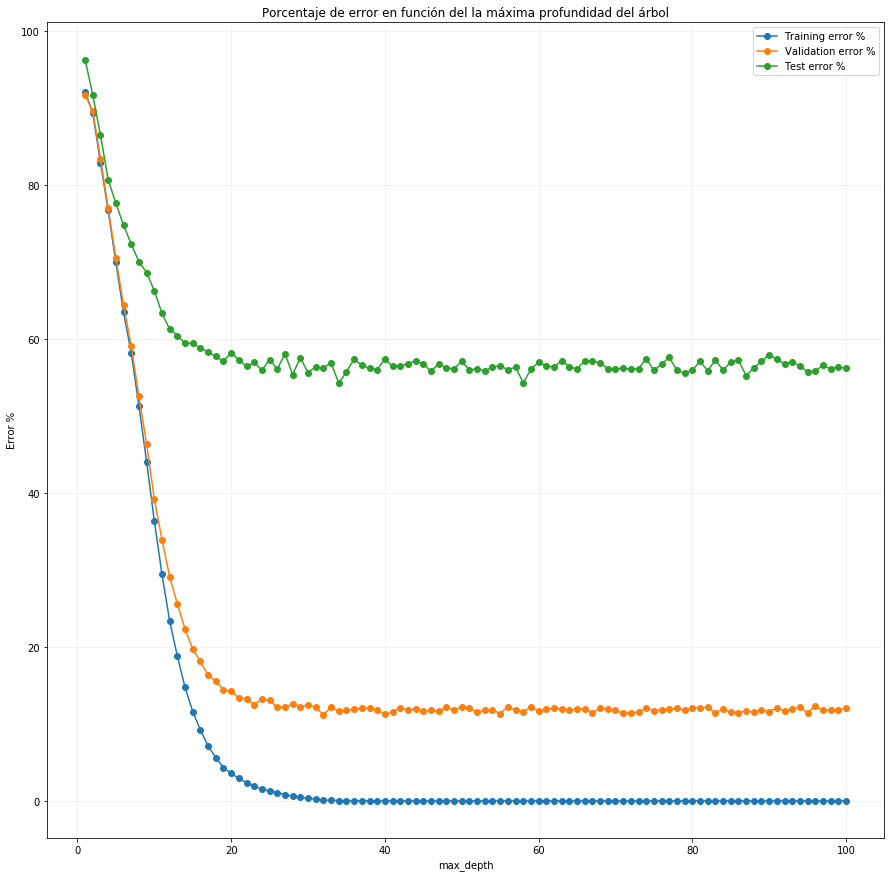

In [642]:
plt.figure(figsize=(15,15))
plt.grid(alpha=0.2)
plt.plot(range(1,101), 100.0*np.array(err_tr_2), marker='o', label='Training error %')
plt.plot(range(1,101), 100.0*np.array(err_v_2), marker='o', label='Validation error %')
plt.plot(range(1,101), 100.0*np.array(err_t_2), marker='o', label='Test error %')
plt.xlabel('max_depth')
plt.ylabel('Error %')
plt.title('Porcentaje de error en función del la máxima profundidad del árbol')
plt.legend(loc='upper right')
plt.show()

Notar que el árbol deja de mejorar al llegar a `max_depth=40` aproximadamente. El error de validación alcanzado fue de:

In [635]:
print('Error de Validación con max_depth=100: '+str(round(100.0*np.array(err_v_2)[-1]))+'%')

Error de Validación con max_depth=100: 12.0%


Se iterárá otra vez, hasta un `max_depth` máximo de 40, y usando los datos escalados:

In [637]:
from sklearn.tree import DecisionTreeClassifier as Tree

depths = range(1,41)

err_tr_3 = []
err_v_3 = []
err_t_3 = []

for d in depths:
    start_time = time.time()
    modelo_4f_2= Tree()
    modelo_4f_2.set_params(max_depth=d,criterion='gini',splitter='best')
    modelo_4f_2.fit(x_tr,y_tr)
    print('[max_depth='+str(d)+'] Entrenado después de: '+str(round(time.time()-start_time))+' [s]')
    start_time = time.time()
    yhat_train = modelo_4f_2.predict(x_tr)
    yhat_test = modelo_4f_2.predict(x_t)
    yhat_val = modelo_4f_2.predict(x_v)
    err_tr_3.append(1-accuracy_score(y_tr, yhat_train))
    err_v_3.append(1-accuracy_score(y_v, yhat_val))
    err_t_3.append(1-accuracy_score(y_t, yhat_test))
    print('[max_depth='+str(d)+'] Evaluado después de: '+str(round(time.time()-start_time))+' [s]')

[max_depth=1] Entrenado después de: 1 [s]
[max_depth=1] Evaluado después de: 0 [s]
[max_depth=2] Entrenado después de: 2 [s]
[max_depth=2] Evaluado después de: 0 [s]
[max_depth=3] Entrenado después de: 2 [s]
[max_depth=3] Evaluado después de: 0 [s]
[max_depth=4] Entrenado después de: 3 [s]
[max_depth=4] Evaluado después de: 0 [s]
[max_depth=5] Entrenado después de: 4 [s]
[max_depth=5] Evaluado después de: 0 [s]
[max_depth=6] Entrenado después de: 6 [s]
[max_depth=6] Evaluado después de: 0 [s]
[max_depth=7] Entrenado después de: 7 [s]
[max_depth=7] Evaluado después de: 0 [s]
[max_depth=8] Entrenado después de: 8 [s]
[max_depth=8] Evaluado después de: 0 [s]
[max_depth=9] Entrenado después de: 9 [s]
[max_depth=9] Evaluado después de: 0 [s]
[max_depth=10] Entrenado después de: 10 [s]
[max_depth=10] Evaluado después de: 0 [s]
[max_depth=11] Entrenado después de: 11 [s]
[max_depth=11] Evaluado después de: 0 [s]
[max_depth=12] Entrenado después de: 13 [s]
[max_depth=12] Evaluado después de: 0

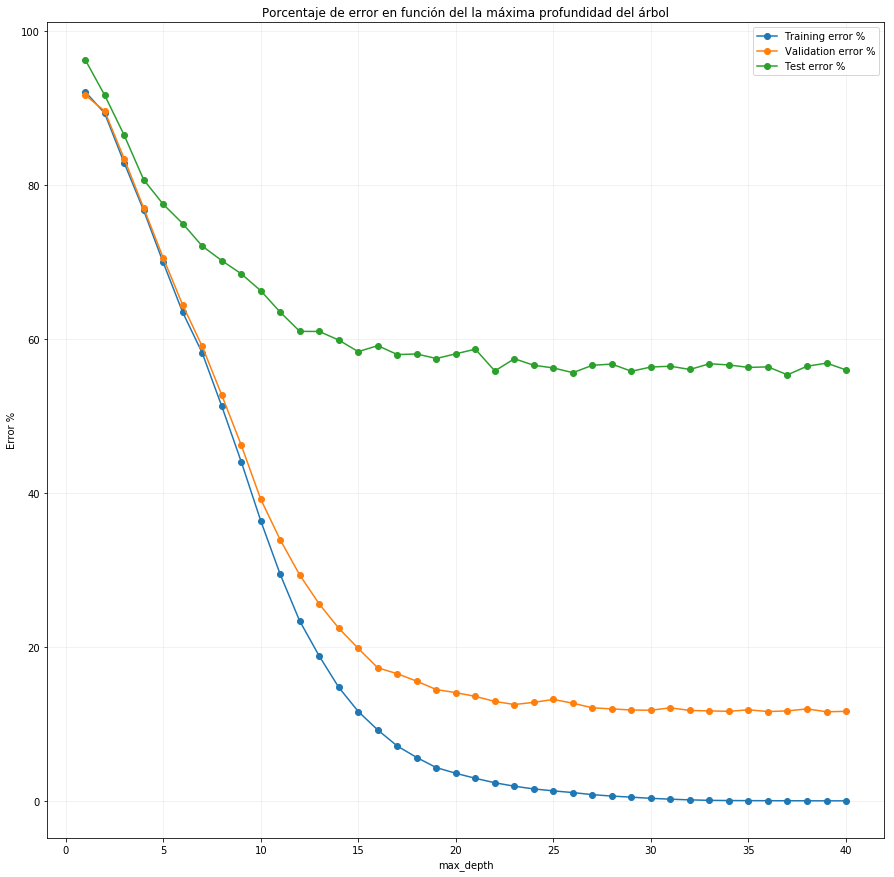

In [643]:
plt.figure(figsize=(15,15))
plt.grid(alpha=0.2)
plt.plot(depths, 100.0*np.array(err_tr_3), marker='o', label='Training error %')
plt.plot(depths, 100.0*np.array(err_v_3), marker='o', label='Validation error %')
plt.plot(depths, 100.0*np.array(err_t_3), marker='o', label='Test error %')
plt.xlabel('max_depth')
plt.ylabel('Error %')
plt.title('Porcentaje de error en función del la máxima profundidad del árbol')
plt.legend(loc='upper right')
plt.show()

In [639]:
print('Error de Validación con max_depth=40: '+str(round(100.0*np.array(err_v_3)[-1]))+'%')

Error de Validación con max_depth=40: 12.0%


Pero, se verifica que el error de verificación es el mismo, por lo que el rendimiento del árbol de clasificación no se afecta por la distribución de datos.

A continuación, se probrá con `criterion=entropy`:

In [644]:
depths = range(1,41)

err_tr_4 = []
err_v_4 = []
err_t_4 = []

for d in depths:
    start_time = time.time()
    modelo_4f_4= Tree()
    modelo_4f_4.set_params(max_depth=d,criterion='entropy',splitter='best')
    modelo_4f_4.fit(x_tr,y_tr)
    print('[max_depth='+str(d)+'] Entrenado después de: '+str(round(time.time()-start_time))+' [s]')
    start_time = time.time()
    yhat_train = modelo_4f_4.predict(x_tr)
    yhat_test = modelo_4f_4.predict(x_t)
    yhat_val = modelo_4f_4.predict(x_v)
    err_tr_4.append(1-accuracy_score(y_tr, yhat_train))
    err_v_4.append(1-accuracy_score(y_v, yhat_val))
    err_t_4.append(1-accuracy_score(y_t, yhat_test))
    print('[max_depth='+str(d)+'] Evaluado después de: '+str(round(time.time()-start_time))+' [s]')

[max_depth=1] Entrenado después de: 1 [s]
[max_depth=1] Evaluado después de: 0 [s]
[max_depth=2] Entrenado después de: 2 [s]
[max_depth=2] Evaluado después de: 0 [s]
[max_depth=3] Entrenado después de: 4 [s]
[max_depth=3] Evaluado después de: 0 [s]
[max_depth=4] Entrenado después de: 6 [s]
[max_depth=4] Evaluado después de: 0 [s]
[max_depth=5] Entrenado después de: 8 [s]
[max_depth=5] Evaluado después de: 0 [s]
[max_depth=6] Entrenado después de: 11 [s]
[max_depth=6] Evaluado después de: 0 [s]
[max_depth=7] Entrenado después de: 15 [s]
[max_depth=7] Evaluado después de: 0 [s]
[max_depth=8] Entrenado después de: 18 [s]
[max_depth=8] Evaluado después de: 0 [s]
[max_depth=9] Entrenado después de: 21 [s]
[max_depth=9] Evaluado después de: 0 [s]
[max_depth=10] Entrenado después de: 24 [s]
[max_depth=10] Evaluado después de: 0 [s]
[max_depth=11] Entrenado después de: 26 [s]
[max_depth=11] Evaluado después de: 0 [s]
[max_depth=12] Entrenado después de: 27 [s]
[max_depth=12] Evaluado después d

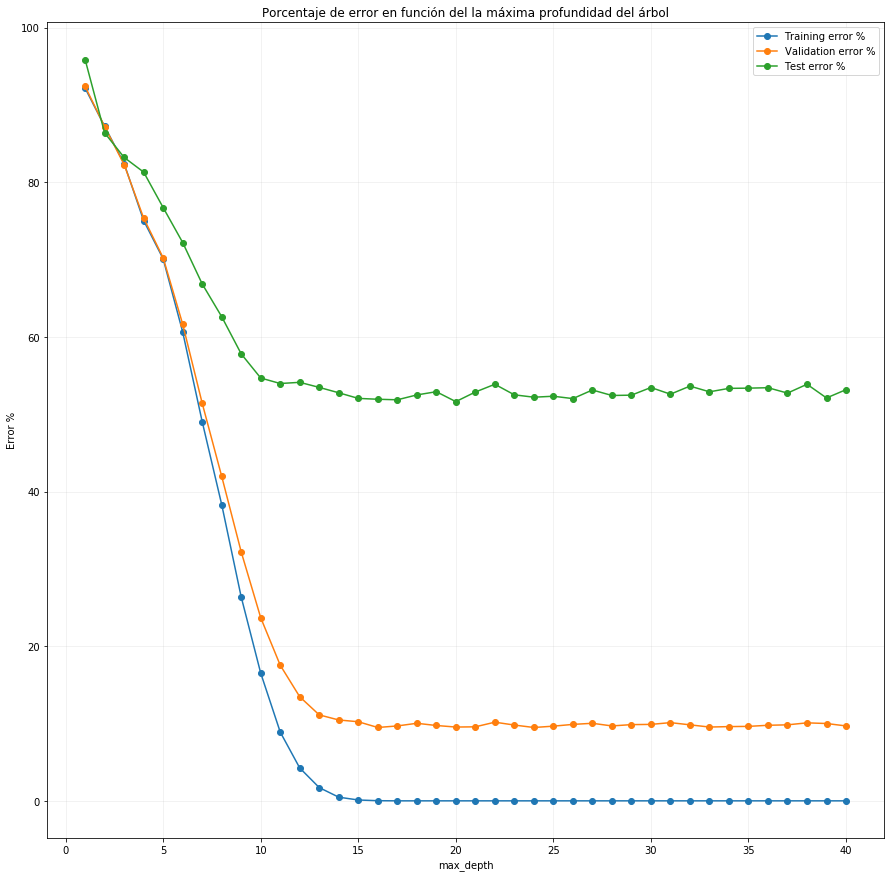

In [645]:
plt.figure(figsize=(15,15))
plt.grid(alpha=0.2)
plt.plot(depths, 100.0*np.array(err_tr_4), marker='o', label='Training error %')
plt.plot(depths, 100.0*np.array(err_v_4), marker='o', label='Validation error %')
plt.plot(depths, 100.0*np.array(err_t_4), marker='o', label='Test error %')
plt.xlabel('max_depth')
plt.ylabel('Error %')
plt.title('Porcentaje de error en función del la máxima profundidad del árbol')
plt.legend(loc='upper right')
plt.show()

In [647]:
print('Error de Validación con max_depth=40 y criterion=\'entropy\': '+str(round(100.0*np.array(err_v_4)[-1]))+'%')

Error de Validación con max_depth=40 y criterion='entropy': 10.0%


En este caso, la convergencia ocurre con profundidades máximas menores que usando `criterion='gini`, logrando mejorar el error de validación desde 12% a 10%. Este nivel de error se alcanza con `max_depth>=15` aproximadamente, aunque el entrenamiento es más lento que usando `criterion='gini'`.

Sin embargo, con ambos modelos, se encuentra que el error de prueba es bastante malo, estando por sobre del 60%. De esto, se puede inferir que los datos no son linealmente separables, incluso dividiéndolos en regiones (*splits*), lo que es esperable, ya que las imágenes tienden a ser parecidas para ciertas clases.